In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.display import display

In [3]:
from heatmap_grammar import Plot, Heatmap, RowAnnotation, ColumnAnnotation, markdown

In [4]:
import pandas as pd
import numpy as np

## Colors

In [5]:
mat = pd.read_csv('data/random.csv', index_col=0)
mat.iloc[:3, :3]

,column1,column2,column3
row1,0.904742,-0.352298,0.501610
row2,0.908830,0.791571,1.072632
row3,0.280747,0.029875,0.705259


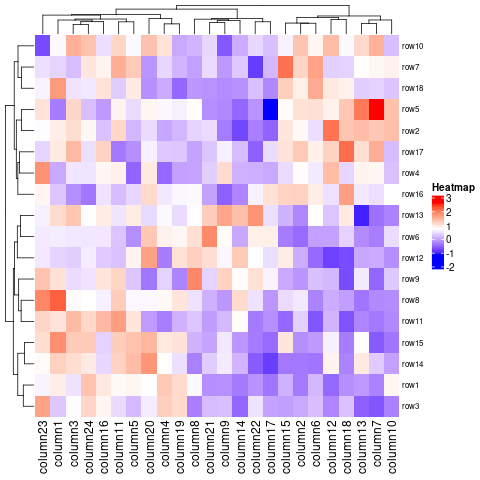

Heatmap(data=        column1  column10  column11  column12  column13  column14  column15  \
row1   0.904742  0.825454  0.782177 -0.496254 -0.089526 -0.355203  0.107269   
row10  0.689084  0.213928  1.150588  1.393869  1.107223  0.061927  0.629332   
row11  1.005565 -0.238123  1.689285  0.121844 -0.251099  0.766305 -0.507796   
row12  0.390475 -0.190113  0.239441 -0.808941  0.020616  1.248925  0.921931   
row13  1.084192 -0.287673  0.523577  0.259704 -1.026624  1.350678  0.117693   
row14  1.189212 -0.027014  1.173052  0.837848  0.951181  0.128442 -0.369264   
row15  1.816784 -0.394301  1.228118  0.616238  0.748030 -0.117850  0.977647   
row16  0.269481  0.734547  0.199247  0.495812  0.552318 -0.251162  1.155240   
row17  0.928462  0.199232 -0.363365  1.166101  1.047292  0.189820  1.018894   
row18  1.708387  0.269122  0.323977  0.940274  0.344599 -0.166604  1.218262   
row2   0.908830  1.350892  1.118338  2.050054  1.377027 -0.774376  0.982966   
row3   0.280747 -0.297309  0.432206 -0.258032 -0.568652 -0.513210 -0.045160   
row4   0.027296  0.242666  0.878387  1.384521  0.837657  0.107971  0.452002   
row5  -0.325524  1.343958  0.851762  0.859802  1.998607 -0.509288  0.770817   
row6   0.584033  0.459498  0.255065 -0.027781 -0.211248  0.016691 -0.325975   
row7   0.395103  0.868901  1.518787  0.356485  0.750354  0.292307  2.064226   
row8   2.198726 -0.207170  1.238067  0.059623 -0.394311  1.093666  0.442325   
row9   1.027091  0.303982  1.150099  0.150577  0.565669  0.763604  0.038980   

       column16  column17  column18  ...  column22  column23  column24  \
row1   0.963222 -0.392452 -0.187801  ... -0.142387  0.640767  1.326629   
row10  0.469589  0.224105  0.694417  ...  0.418894 -0.732949  1.335527   
row11  1.422866 -0.173771 -0.679920  ... -0.354600  1.143212  1.113646   
row12  0.305610  0.466088 -0.730320  ...  0.719762  0.559072  0.587401   
row13  0.922507  0.486998  0.954552  ...  1.779354  0.610510  0.714083   
row14  0.415674 -0.833971 -0.280938  ... -0.610359  0.774831  0.938646   
row15  0.369659 -0.475809 -0.332385  ... -0.344004  1.063158  1.246114   
row16  0.503645  1.025042  1.656206  ...  0.626907  0.825597 -0.376619   
row17  1.167759  0.461134  2.099405  ... -0.569068  0.397350  0.474009   
row18  1.008779 -0.245516  0.867427  ...  0.213232  0.636883  0.549664   
row2   0.238544 -0.535896  1.300354  ... -0.312520  0.705715  0.812094   
row3   0.822729 -0.022514  0.242730  ...  0.512786  1.636133  1.133918   
row4   0.816480  0.026502  0.407260  ...  0.076687  1.785729  0.528008   
row5  -0.094217 -1.154584  1.271597  ... -0.147536  1.012337  0.214075   
row6   0.544604  0.891013  0.369974  ...  0.884911  0.567019  0.537276   
row7   0.841873  0.151764  0.374364  ... -0.843347  0.483482  0.979503   
row8   0.612928 -0.123346 -0.050487  ...  0.502869  1.889751  0.730595   
row9   0.981264  0.635554 -0.721947  ...  1.035254  1.320423  0.512337   

        column3   column4   column5   column6   column7   column8   column9  
row1   0.501610  1.267699  0.825123  0.162152 -0.286987  0.680326 -0.162966  
row10  1.501241  1.007472  0.688694  0.825175  1.488487  0.126659 -0.632698  
row11  1.412690 -0.321574  0.985579 -0.658508 -0.361533  0.274198  0.165891  
row12  0.328041 -0.333738  0.842155 -0.480928  0.052838  1.200386  0.656574  
row13  1.299254  0.693013  0.924822  0.722275 -0.424852  0.722079  1.612041  
row14  1.072238  0.722361  1.378203 -0.390768  0.308993 -0.300130  0.574404  
row15  1.255066  0.953529  1.335348 -0.091463 -0.618137  0.119366  0.548420  
row16 -0.175451  0.558319  0.399609  0.901412  0.475411  0.684301 -0.561554  
row17  1.433426  0.286360 -0.182019  0.881860  1.526356 -0.021435  0.603981  
row18  0.510492  0.053396  0.932890  1.554960  0.369922 -0.112885 -0.201442  
row2   1.072632  0.012995  0.139198  0.468337  1.281495  0.389983 -0.347353  
row3   0.705259  1.215142  0.174727  0.209491 -0.642358 -0.313953  0.217591  
row4   0.533350 -0.496374 -0.526111  0.567244  0.812710 -0.01427

In [6]:
Heatmap(mat)

In [7]:
from heatmap_grammar import scale_fill_gradient2

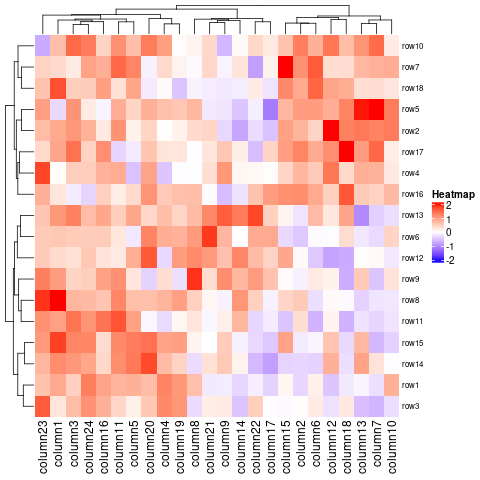

Heatmap(data=        column1  column10  column11  column12  column13  column14  column15  \
row1   0.904742  0.825454  0.782177 -0.496254 -0.089526 -0.355203  0.107269   
row10  0.689084  0.213928  1.150588  1.393869  1.107223  0.061927  0.629332   
row11  1.005565 -0.238123  1.689285  0.121844 -0.251099  0.766305 -0.507796   
row12  0.390475 -0.190113  0.239441 -0.808941  0.020616  1.248925  0.921931   
row13  1.084192 -0.287673  0.523577  0.259704 -1.026624  1.350678  0.117693   
row14  1.189212 -0.027014  1.173052  0.837848  0.951181  0.128442 -0.369264   
row15  1.816784 -0.394301  1.228118  0.616238  0.748030 -0.117850  0.977647   
row16  0.269481  0.734547  0.199247  0.495812  0.552318 -0.251162  1.155240   
row17  0.928462  0.199232 -0.363365  1.166101  1.047292  0.189820  1.018894   
row18  1.708387  0.269122  0.323977  0.940274  0.344599 -0.166604  1.218262   
row2   0.908830  1.350892  1.118338  2.050054  1.377027 -0.774376  0.982966   
row3   0.280747 -0.297309  0.432206 -0.258032 -0.568652 -0.513210 -0.045160   
row4   0.027296  0.242666  0.878387  1.384521  0.837657  0.107971  0.452002   
row5  -0.325524  1.343958  0.851762  0.859802  1.998607 -0.509288  0.770817   
row6   0.584033  0.459498  0.255065 -0.027781 -0.211248  0.016691 -0.325975   
row7   0.395103  0.868901  1.518787  0.356485  0.750354  0.292307  2.064226   
row8   2.198726 -0.207170  1.238067  0.059623 -0.394311  1.093666  0.442325   
row9   1.027091  0.303982  1.150099  0.150577  0.565669  0.763604  0.038980   

       column16  column17  column18  ...  column22  column23  column24  \
row1   0.963222 -0.392452 -0.187801  ... -0.142387  0.640767  1.326629   
row10  0.469589  0.224105  0.694417  ...  0.418894 -0.732949  1.335527   
row11  1.422866 -0.173771 -0.679920  ... -0.354600  1.143212  1.113646   
row12  0.305610  0.466088 -0.730320  ...  0.719762  0.559072  0.587401   
row13  0.922507  0.486998  0.954552  ...  1.779354  0.610510  0.714083   
row14  0.415674 -0.833971 -0.280938  ... -0.610359  0.774831  0.938646   
row15  0.369659 -0.475809 -0.332385  ... -0.344004  1.063158  1.246114   
row16  0.503645  1.025042  1.656206  ...  0.626907  0.825597 -0.376619   
row17  1.167759  0.461134  2.099405  ... -0.569068  0.397350  0.474009   
row18  1.008779 -0.245516  0.867427  ...  0.213232  0.636883  0.549664   
row2   0.238544 -0.535896  1.300354  ... -0.312520  0.705715  0.812094   
row3   0.822729 -0.022514  0.242730  ...  0.512786  1.636133  1.133918   
row4   0.816480  0.026502  0.407260  ...  0.076687  1.785729  0.528008   
row5  -0.094217 -1.154584  1.271597  ... -0.147536  1.012337  0.214075   
row6   0.544604  0.891013  0.369974  ...  0.884911  0.567019  0.537276   
row7   0.841873  0.151764  0.374364  ... -0.843347  0.483482  0.979503   
row8   0.612928 -0.123346 -0.050487  ...  0.502869  1.889751  0.730595   
row9   0.981264  0.635554 -0.721947  ...  1.035254  1.320423  0.512337   

        column3   column4   column5   column6   column7   column8   column9  
row1   0.501610  1.267699  0.825123  0.162152 -0.286987  0.680326 -0.162966  
row10  1.501241  1.007472  0.688694  0.825175  1.488487  0.126659 -0.632698  
row11  1.412690 -0.321574  0.985579 -0.658508 -0.361533  0.274198  0.165891  
row12  0.328041 -0.333738  0.842155 -0.480928  0.052838  1.200386  0.656574  
row13  1.299254  0.693013  0.924822  0.722275 -0.424852  0.722079  1.612041  
row14  1.072238  0.722361  1.378203 -0.390768  0.308993 -0.300130  0.574404  
row15  1.255066  0.953529  1.335348 -0.091463 -0.618137  0.119366  0.548420  
row16 -0.175451  0.558319  0.399609  0.901412  0.475411  0.684301 -0.561554  
row17  1.433426  0.286360 -0.182019  0.881860  1.526356 -0.021435  0.603981  
row18  0.510492  0.053396  0.932890  1.554960  0.369922 -0.112885 -0.201442  
row2   1.072632  0.012995  0.139198  0.468337  1.281495  0.389983 -0.347353  
row3   0.705259  1.215142  0.174727  0.209491 -0.642358 -0.313953  0.217591  
row4   0.533350 -0.496374 -0.526111  0.567244  0.812710 -0.01427

In [8]:
(
    Heatmap(mat)
    + scale_fill_gradient2(quantiles=[0.01, 0.99], symmetrical=True)
)

In general, colours are managed by ggplot-style scales, for example to set NA colour, use `na_value` (note: with underscore, not `na.value`):

In [9]:
np.random.seed(0)
mat_with_na = mat.mask(np.random.random(mat.shape) < .1)

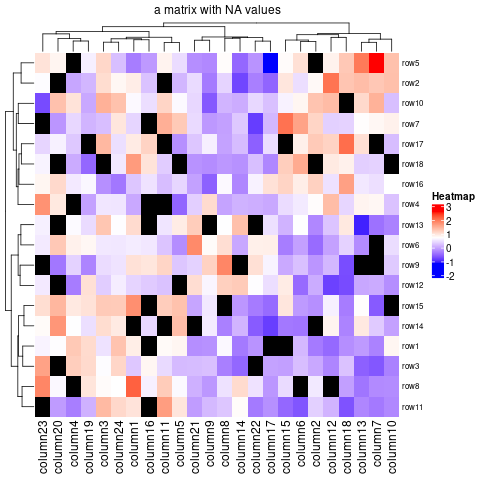

Heatmap(data=        column1  column10  column11  column12  column13  column14  column15  \
row1   0.904742  0.825454  0.782177 -0.496254 -0.089526 -0.355203       NaN   
row10  0.689084  0.213928  1.150588  1.393869  1.107223  0.061927  0.629332   
row11  1.005565 -0.238123  1.689285  0.121844 -0.251099  0.766305 -0.507796   
row12  0.390475 -0.190113  0.239441 -0.808941  0.020616  1.248925  0.921931   
row13  1.084192 -0.287673  0.523577  0.259704 -1.026624  1.350678  0.117693   
row14       NaN -0.027014       NaN  0.837848  0.951181  0.128442 -0.369264   
row15  1.816784       NaN  1.228118  0.616238  0.748030 -0.117850  0.977647   
row16  0.269481  0.734547  0.199247  0.495812  0.552318 -0.251162  1.155240   
row17  0.928462  0.199232       NaN  1.166101  1.047292  0.189820       NaN   
row18  1.708387       NaN  0.323977  0.940274  0.344599 -0.166604  1.218262   
row2   0.908830  1.350892       NaN  2.050054  1.377027 -0.774376  0.982966   
row3   0.280747 -0.297309  0.432206 -0.258032 -0.568652 -0.513210 -0.045160   
row4   0.027296  0.242666       NaN  1.384521  0.837657  0.107971  0.452002   
row5  -0.325524  1.343958  0.851762  0.859802  1.998607 -0.509288  0.770817   
row6   0.584033  0.459498  0.255065 -0.027781 -0.211248  0.016691 -0.325975   
row7   0.395103  0.868901  1.518787  0.356485  0.750354  0.292307  2.064226   
row8   2.198726 -0.207170  1.238067       NaN -0.394311  1.093666  0.442325   
row9   1.027091  0.303982  1.150099  0.150577       NaN       NaN  0.038980   

       column16  column17  column18  ...  column22  column23  column24  \
row1        NaN       NaN -0.187801  ... -0.142387  0.640767  1.326629   
row10  0.469589  0.224105       NaN  ...  0.418894 -0.732949  1.335527   
row11       NaN -0.173771 -0.679920  ... -0.354600       NaN  1.113646   
row12  0.305610  0.466088 -0.730320  ...  0.719762  0.559072  0.587401   
row13       NaN  0.486998  0.954552  ...       NaN  0.610510  0.714083   
row14  0.415674 -0.833971 -0.280938  ... -0.610359  0.774831  0.938646   
row15       NaN -0.475809 -0.332385  ... -0.344004  1.063158  1.246114   
row16  0.503645  1.025042  1.656206  ...  0.626907  0.825597 -0.376619   
row17  1.167759  0.461134  2.099405  ... -0.569068  0.397350  0.474009   
row18  1.008779 -0.245516  0.867427  ...  0.213232  0.636883  0.549664   
row2   0.238544 -0.535896  1.300354  ... -0.312520  0.705715  0.812094   
row3   0.822729 -0.022514  0.242730  ...       NaN  1.636133  1.133918   
row4        NaN  0.026502  0.407260  ...  0.076687  1.785729  0.528008   
row5  -0.094217 -1.154584  1.271597  ... -0.147536  1.012337  0.214075   
row6   0.544604  0.891013  0.369974  ...  0.884911  0.567019  0.537276   
row7        NaN  0.151764  0.374364  ... -0.843347       NaN  0.979503   
row8   0.612928 -0.123346 -0.050487  ...  0.502869  1.889751  0.730595   
row9   0.981264  0.635554 -0.721947  ...  1.035254       NaN  0.512337   

        column3   column4   column5   column6   column7   column8   column9  
row1   0.501610  1.267699  0.825123  0.162152 -0.286987  0.680326 -0.162966  
row10  1.501241  1.007472  0.688694  0.825175  1.488487  0.126659 -0.632698  
row11  1.412690 -0.321574  0.985579 -0.658508 -0.361533  0.274198  0.165891  
row12  0.328041 -0.333738       NaN -0.480928  0.052838  1.200386  0.656574  
row13  1.299254  0.693013  0.924822  0.722275 -0.424852  0.722079       NaN  
row14  1.072238  0.722361  1.378203 -0.390768  0.308993 -0.300130  0.574404  
row15  1.255066  0.953529  1.335348 -0.091463 -0.618137       NaN  0.548420  
row16 -0.175451  0.558319  0.399609  0.901412  0.475411  0.684301 -0.561554  
row17  1.433426  0.286360 -0.182019  0.881860       NaN -0.021435  0.603981  
row18       NaN  0.053396       NaN  1.554960  0.369922 -0.112885 -0.201442  
row2   1.072632  0.012995  0.139198  0.468337  1.281495  0.389983 -0.347353  
row3   0.705259  1.215142  0.174727  0.209491 -0.642358 -0.313953  0.217591  
row4   0.533350       NaN -0.526111  0.567244  0.812710 -0.01427

In [10]:
(
    Heatmap(
        mat_with_na,
        title='a matrix with NA values'
    )
    + scale_fill_gradient2(na_value='black')
)

### 2.3.1 Distance methods

In [11]:
mat_with_outliers = mat.copy()
for i in range(10):
    mat_with_outliers.iloc[i, i] = 1000

In [12]:
from heatmap_grammar import clustering_distance, scale_fill_gradient_n, HeatmapTheme

In [13]:
from sklearn.metrics.pairwise import nan_euclidean_distances

In [14]:
@clustering_distance
def robust_dist(data: pd.DataFrame):
    low = data.quantile(0.1)
    high = data.quantile(0.9)
    is_deemed_outlier = (data < low) | (data > high)
    without_outliers = data.mask(is_deemed_outlier)
    return pd.DataFrame(nan_euclidean_distances(without_outliers))

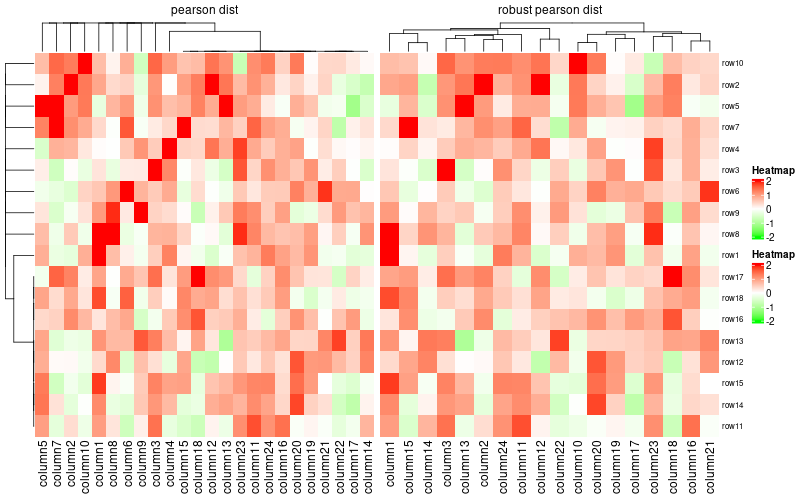

In [15]:
robust_scale = scale_fill_gradient_n(
    colors=['green', 'white', 'red'],
    points=[-2, 0, 2],
    quantiles=[0.01, 0.95],
    symmetrical=True
)
(
    Plot().size(w=800, h=500)
    + (
        Heatmap(
            mat_with_outliers,
            title='pearson dist'
        )
        + robust_scale
    )
    + (
        Heatmap(
            mat_with_outliers,
            clustering_distance_rows=robust_dist,
            clustering_distance_columns=robust_dist,
            title='robust pearson dist'
        )
        + robust_scale
    )
)

In [16]:
@clustering_distance
def robust_pearson_dist(data: pd.DataFrame):
    low = data.quantile(0.1)
    high = data.quantile(0.9)
    is_deemed_outlier = (data < low) | (data > high)
    without_outliers = data.mask(is_deemed_outlier)
    return 1 - without_outliers.corr(method='pearson')

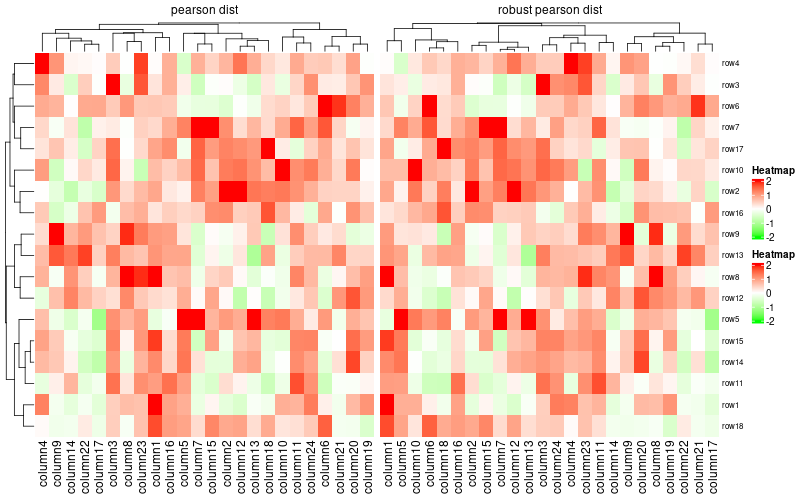

In [17]:
(
    Plot().size(w=800, h=500)
    + (
        Heatmap(
            mat_with_outliers,
            clustering_distance_rows='pearson',
            clustering_distance_columns='pearson',
            title='pearson dist'
        )
        + robust_scale
    )
    + (
        Heatmap(
            mat_with_outliers,
            clustering_distance_rows=robust_pearson_dist,
            clustering_distance_columns=robust_pearson_dist,
            title='robust pearson dist'
        )
        + robust_scale
    )
)

### 2.3.3 Render dendrograms

In [18]:
from rpy2.robjects.packages import importr
from heatmap_grammar.rpy2_helpers import py2rpy

In [19]:
dendextend = importr('dendextend')
stats = importr('stats')

r_mat = py2rpy(mat)
row_dend = stats.as_dendrogram(stats.hclust(stats.dist(r_mat)))
row_dend = dendextend.color_branches(row_dend, k=2)

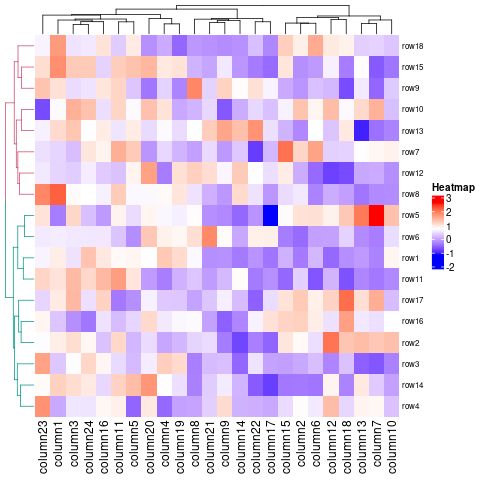

Heatmap(data=        column1  column10  column11  column12  column13  column14  column15  \
row1   0.904742  0.825454  0.782177 -0.496254 -0.089526 -0.355203  0.107269   
row10  0.689084  0.213928  1.150588  1.393869  1.107223  0.061927  0.629332   
row11  1.005565 -0.238123  1.689285  0.121844 -0.251099  0.766305 -0.507796   
row12  0.390475 -0.190113  0.239441 -0.808941  0.020616  1.248925  0.921931   
row13  1.084192 -0.287673  0.523577  0.259704 -1.026624  1.350678  0.117693   
row14  1.189212 -0.027014  1.173052  0.837848  0.951181  0.128442 -0.369264   
row15  1.816784 -0.394301  1.228118  0.616238  0.748030 -0.117850  0.977647   
row16  0.269481  0.734547  0.199247  0.495812  0.552318 -0.251162  1.155240   
row17  0.928462  0.199232 -0.363365  1.166101  1.047292  0.189820  1.018894   
row18  1.708387  0.269122  0.323977  0.940274  0.344599 -0.166604  1.218262   
row2   0.908830  1.350892  1.118338  2.050054  1.377027 -0.774376  0.982966   
row3   0.280747 -0.297309  0.432206 -0.258032 -0.568652 -0.513210 -0.045160   
row4   0.027296  0.242666  0.878387  1.384521  0.837657  0.107971  0.452002   
row5  -0.325524  1.343958  0.851762  0.859802  1.998607 -0.509288  0.770817   
row6   0.584033  0.459498  0.255065 -0.027781 -0.211248  0.016691 -0.325975   
row7   0.395103  0.868901  1.518787  0.356485  0.750354  0.292307  2.064226   
row8   2.198726 -0.207170  1.238067  0.059623 -0.394311  1.093666  0.442325   
row9   1.027091  0.303982  1.150099  0.150577  0.565669  0.763604  0.038980   

       column16  column17  column18  ...  column22  column23  column24  \
row1   0.963222 -0.392452 -0.187801  ... -0.142387  0.640767  1.326629   
row10  0.469589  0.224105  0.694417  ...  0.418894 -0.732949  1.335527   
row11  1.422866 -0.173771 -0.679920  ... -0.354600  1.143212  1.113646   
row12  0.305610  0.466088 -0.730320  ...  0.719762  0.559072  0.587401   
row13  0.922507  0.486998  0.954552  ...  1.779354  0.610510  0.714083   
row14  0.415674 -0.833971 -0.280938  ... -0.610359  0.774831  0.938646   
row15  0.369659 -0.475809 -0.332385  ... -0.344004  1.063158  1.246114   
row16  0.503645  1.025042  1.656206  ...  0.626907  0.825597 -0.376619   
row17  1.167759  0.461134  2.099405  ... -0.569068  0.397350  0.474009   
row18  1.008779 -0.245516  0.867427  ...  0.213232  0.636883  0.549664   
row2   0.238544 -0.535896  1.300354  ... -0.312520  0.705715  0.812094   
row3   0.822729 -0.022514  0.242730  ...  0.512786  1.636133  1.133918   
row4   0.816480  0.026502  0.407260  ...  0.076687  1.785729  0.528008   
row5  -0.094217 -1.154584  1.271597  ... -0.147536  1.012337  0.214075   
row6   0.544604  0.891013  0.369974  ...  0.884911  0.567019  0.537276   
row7   0.841873  0.151764  0.374364  ... -0.843347  0.483482  0.979503   
row8   0.612928 -0.123346 -0.050487  ...  0.502869  1.889751  0.730595   
row9   0.981264  0.635554 -0.721947  ...  1.035254  1.320423  0.512337   

        column3   column4   column5   column6   column7   column8   column9  
row1   0.501610  1.267699  0.825123  0.162152 -0.286987  0.680326 -0.162966  
row10  1.501241  1.007472  0.688694  0.825175  1.488487  0.126659 -0.632698  
row11  1.412690 -0.321574  0.985579 -0.658508 -0.361533  0.274198  0.165891  
row12  0.328041 -0.333738  0.842155 -0.480928  0.052838  1.200386  0.656574  
row13  1.299254  0.693013  0.924822  0.722275 -0.424852  0.722079  1.612041  
row14  1.072238  0.722361  1.378203 -0.390768  0.308993 -0.300130  0.574404  
row15  1.255066  0.953529  1.335348 -0.091463 -0.618137  0.119366  0.548420  
row16 -0.175451  0.558319  0.399609  0.901412  0.475411  0.684301 -0.561554  
row17  1.433426  0.286360 -0.182019  0.881860  1.526356 -0.021435  0.603981  
row18  0.510492  0.053396  0.932890  1.554960  0.369922 -0.112885 -0.201442  
row2   1.072632  0.012995  0.139198  0.468337  1.281495  0.389983 -0.347353  
row3   0.705259  1.215142  0.174727  0.209491 -0.642358 -0.313953  0.217591  
row4   0.533350 -0.496374 -0.526111  0.567244  0.812710 -0.01427

In [20]:
Heatmap(mat, cluster_rows=row_dend)

In [21]:
from rpy2.rinterface import rternalize
import random

base = importr('base')
circlize = importr('circlize')

assign_attr = base._env['attr<-']

In [22]:
@rternalize
def annotate_node(d):
    value = base.list(
        cex=0.8,
        pch=random.choice(range(20)),
        col=circlize.rand_color(1)
    )
    return assign_attr(d, 'nodePar', value=value)

In [23]:
from heatmap_grammar import RowDendrogram, unit

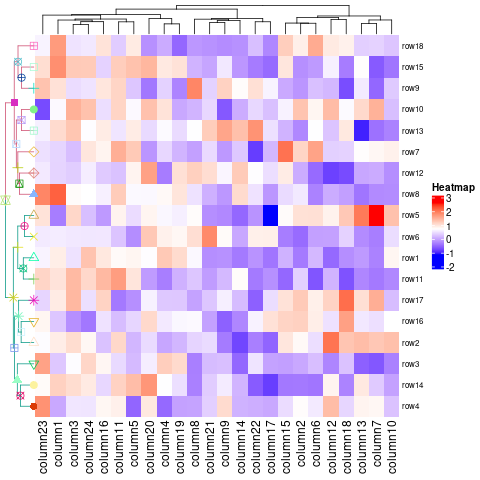

Heatmap(data=        column1  column10  column11  column12  column13  column14  column15  \
row1   0.904742  0.825454  0.782177 -0.496254 -0.089526 -0.355203  0.107269   
row10  0.689084  0.213928  1.150588  1.393869  1.107223  0.061927  0.629332   
row11  1.005565 -0.238123  1.689285  0.121844 -0.251099  0.766305 -0.507796   
row12  0.390475 -0.190113  0.239441 -0.808941  0.020616  1.248925  0.921931   
row13  1.084192 -0.287673  0.523577  0.259704 -1.026624  1.350678  0.117693   
row14  1.189212 -0.027014  1.173052  0.837848  0.951181  0.128442 -0.369264   
row15  1.816784 -0.394301  1.228118  0.616238  0.748030 -0.117850  0.977647   
row16  0.269481  0.734547  0.199247  0.495812  0.552318 -0.251162  1.155240   
row17  0.928462  0.199232 -0.363365  1.166101  1.047292  0.189820  1.018894   
row18  1.708387  0.269122  0.323977  0.940274  0.344599 -0.166604  1.218262   
row2   0.908830  1.350892  1.118338  2.050054  1.377027 -0.774376  0.982966   
row3   0.280747 -0.297309  0.432206 -0.258032 -0.568652 -0.513210 -0.045160   
row4   0.027296  0.242666  0.878387  1.384521  0.837657  0.107971  0.452002   
row5  -0.325524  1.343958  0.851762  0.859802  1.998607 -0.509288  0.770817   
row6   0.584033  0.459498  0.255065 -0.027781 -0.211248  0.016691 -0.325975   
row7   0.395103  0.868901  1.518787  0.356485  0.750354  0.292307  2.064226   
row8   2.198726 -0.207170  1.238067  0.059623 -0.394311  1.093666  0.442325   
row9   1.027091  0.303982  1.150099  0.150577  0.565669  0.763604  0.038980   

       column16  column17  column18  ...  column22  column23  column24  \
row1   0.963222 -0.392452 -0.187801  ... -0.142387  0.640767  1.326629   
row10  0.469589  0.224105  0.694417  ...  0.418894 -0.732949  1.335527   
row11  1.422866 -0.173771 -0.679920  ... -0.354600  1.143212  1.113646   
row12  0.305610  0.466088 -0.730320  ...  0.719762  0.559072  0.587401   
row13  0.922507  0.486998  0.954552  ...  1.779354  0.610510  0.714083   
row14  0.415674 -0.833971 -0.280938  ... -0.610359  0.774831  0.938646   
row15  0.369659 -0.475809 -0.332385  ... -0.344004  1.063158  1.246114   
row16  0.503645  1.025042  1.656206  ...  0.626907  0.825597 -0.376619   
row17  1.167759  0.461134  2.099405  ... -0.569068  0.397350  0.474009   
row18  1.008779 -0.245516  0.867427  ...  0.213232  0.636883  0.549664   
row2   0.238544 -0.535896  1.300354  ... -0.312520  0.705715  0.812094   
row3   0.822729 -0.022514  0.242730  ...  0.512786  1.636133  1.133918   
row4   0.816480  0.026502  0.407260  ...  0.076687  1.785729  0.528008   
row5  -0.094217 -1.154584  1.271597  ... -0.147536  1.012337  0.214075   
row6   0.544604  0.891013  0.369974  ...  0.884911  0.567019  0.537276   
row7   0.841873  0.151764  0.374364  ... -0.843347  0.483482  0.979503   
row8   0.612928 -0.123346 -0.050487  ...  0.502869  1.889751  0.730595   
row9   0.981264  0.635554 -0.721947  ...  1.035254  1.320423  0.512337   

        column3   column4   column5   column6   column7   column8   column9  
row1   0.501610  1.267699  0.825123  0.162152 -0.286987  0.680326 -0.162966  
row10  1.501241  1.007472  0.688694  0.825175  1.488487  0.126659 -0.632698  
row11  1.412690 -0.321574  0.985579 -0.658508 -0.361533  0.274198  0.165891  
row12  0.328041 -0.333738  0.842155 -0.480928  0.052838  1.200386  0.656574  
row13  1.299254  0.693013  0.924822  0.722275 -0.424852  0.722079  1.612041  
row14  1.072238  0.722361  1.378203 -0.390768  0.308993 -0.300130  0.574404  
row15  1.255066  0.953529  1.335348 -0.091463 -0.618137  0.119366  0.548420  
row16 -0.175451  0.558319  0.399609  0.901412  0.475411  0.684301 -0.561554  
row17  1.433426  0.286360 -0.182019  0.881860  1.526356 -0.021435  0.603981  
row18  0.510492  0.053396  0.932890  1.554960  0.369922 -0.112885 -0.201442  
row2   1.072632  0.012995  0.139198  0.468337  1.281495  0.389983 -0.347353  
row3   0.705259  1.215142  0.174727  0.209491 -0.642358 -0.313953  0.217591  
row4   0.533350 -0.496374 -0.526111  0.567244  0.812710 -0.01427

In [24]:
row_dend2 = stats.dendrapply(row_dend, annotate_node)
Heatmap(mat, cluster_rows=row_dend2) + RowDendrogram(width=unit(2, "cm"))

### 2.3.4 Reorder dendrograms

In [25]:
m2 = pd.DataFrame(np.arange(1, 101).reshape((10, 10)))

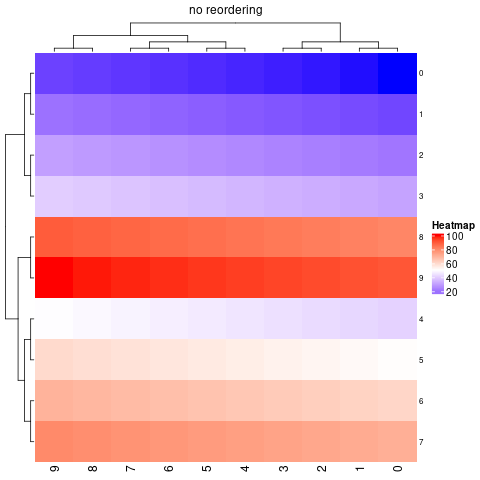

Heatmap(data=    0   1   2   3   4   5   6   7   8    9
0   1   2   3   4   5   6   7   8   9   10
1  11  12  13  14  15  16  17  18  19   20
2  21  22  23  24  25  26  27  28  29   30
3  31  32  33  34  35  36  37  38  39   40
4  41  42  43  44  45  46  47  48  49   50
5  51  52  53  54  55  56  57  58  59   60
6  61  62  63  64  65  66  67  68  69   70
7  71  72  73  74  75  76  77  78  79   80
8  81  82  83  84  85  86  87  88  89   90
9  91  92  93  94  95  96  97  98  99  100, weight=None, border=False, top_annotation=None, height=None, width=None, row_gap=Unit(x=0.5, units='mm', data=None), column_gap=Unit(x=0.5, units='mm', data=None), title='no reordering', name='heatmap10', cluster_rows=True, cluster_columns=True, show_row_names=True, show_column_names=True, clustering_distance_columns='euclidean', clustering_method_columns='complete', clustering_distance_rows='euclidean', clustering_method_rows='complete', row_names=<rpy2.robjects.vectors.ListVector object at 0x7fe599186200> [RTYPES.VECSXP]
R classes: ('gpar',)
[FloatSexpVector]
  fontsize: <class 'rpy2.rinterface.FloatSexpVector'>
  <rpy2.rinterface.FloatSexpVector object at 0x7fe56ea7dc00> [RTYPES.REALSXP], column_title=<rpy2.robjects.vectors.ListVector object at 0x7fe58ce45d80> [RTYPES.VECSXP]
R classes: ('gpar',)
[]
, column_labels=None, row_labels=None, scales={'fill': scale_fill_gradient_n(aesthetic='fill', guide=guide_colourbar(title=unset, label=True, direction='vertical', border=unset, background=unset), name=unset, na_value='grey50', _fitted=False, colors=['blue', 'white', 'red'], space='LAB', limits=None, points=unset, breaks=unset, quantiles=[0, 1], symmetrical=False, color_ramp_kwargs={})}, dendrograms={'row': RowDendrogram(show=True, side=unset, reorder=False, axis='row', decorate=None, width=Unit(x=1, units='cm', data=None)), 'column': ColumnDendrogram(show=True, side=unset, reorder=unset, axis='column', decorate=None, height=Unit(x=1, units='cm', data=None))}, manage_heatmap_legend=True)

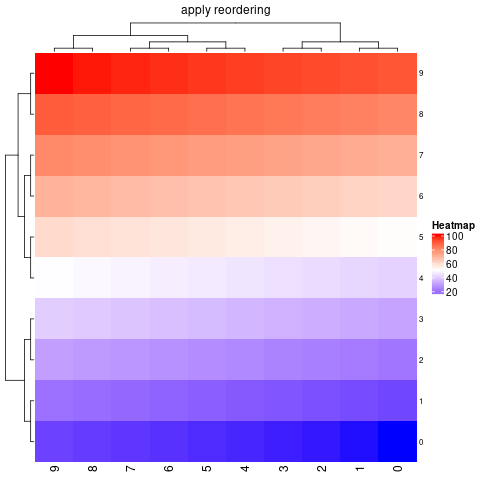

Heatmap(data=    0   1   2   3   4   5   6   7   8    9
0   1   2   3   4   5   6   7   8   9   10
1  11  12  13  14  15  16  17  18  19   20
2  21  22  23  24  25  26  27  28  29   30
3  31  32  33  34  35  36  37  38  39   40
4  41  42  43  44  45  46  47  48  49   50
5  51  52  53  54  55  56  57  58  59   60
6  61  62  63  64  65  66  67  68  69   70
7  71  72  73  74  75  76  77  78  79   80
8  81  82  83  84  85  86  87  88  89   90
9  91  92  93  94  95  96  97  98  99  100, weight=None, border=False, top_annotation=None, height=None, width=None, row_gap=Unit(x=0.5, units='mm', data=None), column_gap=Unit(x=0.5, units='mm', data=None), title='apply reordering', name='heatmap11', cluster_rows=True, cluster_columns=True, show_row_names=True, show_column_names=True, clustering_distance_columns='euclidean', clustering_method_columns='complete', clustering_distance_rows='euclidean', clustering_method_rows='complete', row_names=<rpy2.robjects.vectors.ListVector object at 0x7fe599186200> [RTYPES.VECSXP]
R classes: ('gpar',)
[FloatSexpVector]
  fontsize: <class 'rpy2.rinterface.FloatSexpVector'>
  <rpy2.rinterface.FloatSexpVector object at 0x7fe56ea6f480> [RTYPES.REALSXP], column_title=<rpy2.robjects.vectors.ListVector object at 0x7fe58ce45d80> [RTYPES.VECSXP]
R classes: ('gpar',)
[]
, column_labels=None, row_labels=None, scales={'fill': scale_fill_gradient_n(aesthetic='fill', guide=guide_colourbar(title=unset, label=True, direction='vertical', border=unset, background=unset), name=unset, na_value='grey50', _fitted=False, colors=['blue', 'white', 'red'], space='LAB', limits=None, points=unset, breaks=unset, quantiles=[0, 1], symmetrical=False, color_ramp_kwargs={})}, dendrograms={'row': RowDendrogram(show=True, side=unset, reorder=True, axis='row', decorate=None, width=Unit(x=1, units='cm', data=None)), 'column': ColumnDendrogram(show=True, side=unset, reorder=unset, axis='column', decorate=None, height=Unit(x=1, units='cm', data=None))}, manage_heatmap_legend=True)

In [26]:
display(Heatmap(m2, title='no reordering') + RowDendrogram(reorder=False))
display(Heatmap(m2, title='apply reordering') + RowDendrogram(reorder=True))

# More Examples

Example "14.3 Visualize Cell Heterogeneity from Single Cell RNASeq" from https://jokergoo.github.io/ComplexHeatmap-reference/book/more-examples.html

In [27]:
expr = pd.read_table('mouse_scRNAseq_corrected.txt', index_col=0)
expr.iloc[:3, :3]

,Cell 1,Cell 2,Cell 3
Gnai3,3.23220,1.98320,2.2482
Cdc45,3.19810,1.17300,3.1705
Narf,0.29411,0.49389,1.6279


In [28]:
len(expr)

7073

Drop duplicate genes:

In [29]:
expr = expr[~expr.index.duplicated(keep='first')]
len(expr)

7071

In [30]:
expr = expr[(expr > 0).mean(axis=1) > 0.5]
len(expr)

6092

Extract "signature" genes:

In [31]:
def get_correlated_variable_genes(data, cor_cutoff=0.5, n_cutoff=20):
    dt = expr.T.corr(method='spearman')
    np.fill_diagonal(dt.values, 0)
    dt[dt.abs() < cor_cutoff] = 0
    dt[dt < 0] = -1
    dt[dt > 0] = 1
    should_keep = dt.abs().sum() > n_cutoff
    return expr[should_keep]

In [32]:
mat = get_correlated_variable_genes(expr)

In [33]:
from scipy.stats import zscore

In [34]:
def trim_and_scale(df):
    df = df.copy()
    q10 = df.quantile(0.1, axis=1)
    q90 = df.quantile(0.9, axis=1)
    return (
        df.T
        .mask(df.T < q10, other=q10, axis=1)
        .mask(df.T > q90, other=q90, axis=1)
        .T
        .apply(zscore, axis=1)
    )

In [35]:
mat2 = trim_and_scale(mat)

In [36]:
cc = pd.read_csv('data/mouse_cell_cycle_gene.csv', index_col=0).squeeze()
rp = pd.read_csv('data/mouse_ribonucleoprotein.csv', index_col=0).squeeze()

In [37]:
from heatmap_grammar import scale_fill_manual, Annotation, unit, ColumnDendrogram, RowDendrogram

In [38]:
base_mean = mat.mean(axis=1).rename('base expr')

In [39]:
rpl = pd.Series(
    mat.index.isin(rp),
    index=mat.index,
    name='ribonucleoprotein'
)

In [40]:
ccl = pd.Series(
    mat.index.isin(cc),
    index=mat.index,
    name='cell cycle'
)

In [41]:
names_to_highlight = (
    (ccl & (base_mean > base_mean.quantile(0.25)))
    .to_frame('should_annotate')
    .assign(gene=lambda df: df.index)
)
names_to_highlight.head(3)

,should_annotate,gene
Sdhd,False,Sdhd
Ccnd2,True,Ccnd2
Dazap2,False,Dazap2


In [42]:
grid = importr('grid')

In [43]:
from rpy2.rinterface import NA

In [44]:
@rternalize
def highlight_split(tree):
    assignments = list(
        stats.cutree(stats.as_hclust(tree), k=2)
        .rx(stats.order_dendrogram(tree))
    )
    rev_assignments = assignments[::-1]

    def first_index(i):
        return assignments.index(i) + 1

    def last_index(i):
        return len(assignments) - rev_assignments.index(i) - 1 + 1

    x1 = pd.Series([first_index(1), first_index(2)]) - 1
    x2 = pd.Series([last_index(1), last_index(2)])

    positions = x1 / len(assignments)
    widths = (x2 - x1) / len(assignments)

    return grid.grid_rect(
        x=base.c(*positions),
        width=base.c(*widths),
        just='left',
        default_units='npc',
        gp=grid.gpar(
            fill=base.c("#FF000040", "#00FF0040"),
            col=NA
        )
    )

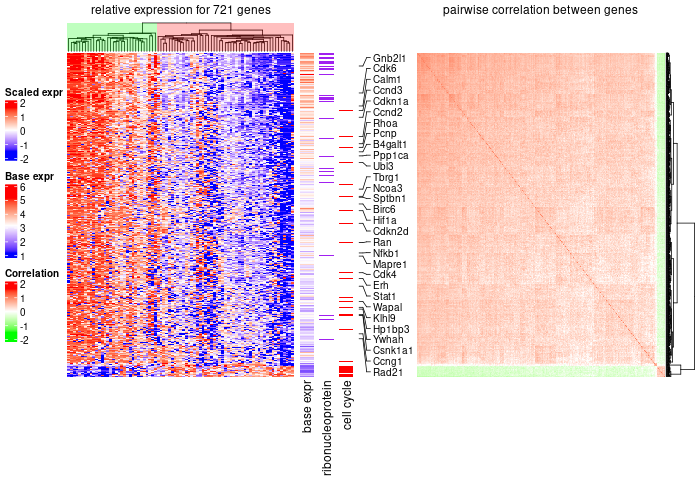

In [45]:
(
    Plot().size(w=700)
    + (
        Heatmap(
            mat2,
            name='scaled_expr',
            title=f'relative expression for {len(mat)} genes',
            show_column_names=False,
            show_row_names=False,
            width=unit(8, 'cm'),
        )
        + scale_fill_gradient_n(
            colors=['blue', 'white', 'red'],
            points=[-1.5, 0, 1.6],
            name='Scaled expr',
        )
        + ColumnDendrogram(decorate=highlight_split)
    )
    + (
        Heatmap(
            base_mean,
            show_row_names=False,
            width=unit(5, "mm"),
        )
        + scale_fill_gradient_n(
            colors=['blue', 'white', 'red'],
            name='Base expr'
        )
    )
    + (
        Heatmap(
            rpl + 0,
            show_row_names=False,
            width=unit(5, "mm"),
        )
        + scale_fill_manual(
            values={'0': 'white', '1': 'purple'},
            guide='none'
        )
    )
    + (
        Heatmap(
            ccl + 0,
            show_row_names=False,
            width=unit(5, "mm"),
        )
        + scale_fill_manual(
            values={'0': 'white', '1': 'red'},
            guide='none'
        )
    )
    + (
        RowAnnotation(names_to_highlight)
        + Annotation(
            geom='mark',
            mapping=dict(
                value='should_annotate',
                label='gene'
            ),
            geom_arguments=dict(
                labels_gp=grid.gpar(fontsize=10),
                padding=grid.unit(1, 'mm')
            )
        )
    )
    + (
        Heatmap(
            mat2.T.corr(),
            name='cor',
            title='pairwise correlation between genes',
            show_column_names=False,
            show_row_names=False
        )
        + ColumnDendrogram(show=False)
        + RowDendrogram(side='right')
        + scale_fill_gradient_n(
            colors=['green', 'white', 'red'],
            points=[-1.5, 0, 1.6],
            name='Correlation',
        )
    )
    + HeatmapTheme(main_heatmap='cor')
)